In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
def read_inputs():
    mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
    train_X,train_y,test_X,test_y = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
    return train_X,train_y,test_X,test_y

In [4]:
def weights_biases_placeholder(n_dim, n_classes):
    with tf.name_scope("Inputs"):
        X=tf.placeholder(tf.float32,[None,n_dim])
        Y=tf.placeholder(tf.float32,[None,n_classes])
    with tf.name_scope("variables"):
        w = tf.Variable(tf.random_normal([n_dim,n_classes],stddev=0.01),name='weights')
        b = tf.Variable(tf.random_normal([n_classes]),name='bias')
    return X,Y,w,b   

In [5]:
def forward_pass(w,b,X):
    out = tf.matmul(X,w)+b
    return out

In [21]:
def multiclass_cost(out,y):
    cost = tf.reduce_min(tf.nn.softmax_cross_entropy_with_logits_v2(logits=out,labels=y))
    return cost

In [9]:
def train_opt(learning_rate, cost):
    op_train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    return op_train

In [11]:
train_X,train_y,test_X,test_y = read_inputs()
X,Y,w,b = weights_biases_placeholder(train_X.shape[1],train_y.shape[1])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [17]:
import matplotlib.pyplot as plt

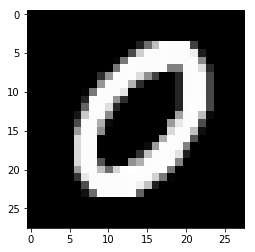

In [28]:
plt.imshow(train_X[15].reshape(28,28),cmap='gray')
plt.show()

In [23]:
out = forward_pass(w,b,X)
cost = multiclass_cost(out,Y)
learning_rate,epochs = 0.01,1000
op_train = train_opt(learning_rate,cost)
loss_trace = []
accuracy_trace = []

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(epochs):
        _,loss_ = sess.run([op_train,cost],feed_dict={X:train_X,Y:train_y})
        accuracy_ = np.mean(np.argmax(sess.run(out, feed_dict={X:train_X,Y:train_y} ),axis=1)==np.argmax(train_y,axis=1))
        loss_trace.append(loss_)
        accuracy_trace.append(accuracy_)
        if (((i+1) >= 100) and ((i+1) % 100 ==0)):
            print("Epoch :",(i+1)," Loss :",loss_," accuracy :",accuracy_)
    
    print("Training results : Loss = ", loss_, "accuracy : ",accuracy_)
    loss_test = sess.run(cost, feed_dict={X:test_X,Y:test_y})
    test_pred = np.argmax(sess.run(out, feed_dict={X:test_X,Y:test_y}),axis=1)
    accuracy = np.mean(test_pred == np.argmax(test_y,axis=1))
    print("Results on the Test dataset : loss = ",loss_test," accuracy on test : ",accuracy)

InternalError: Blas GEMM launch failed : a.shape=(55000, 784), b.shape=(784, 10), m=55000, n=10, k=784
	 [[node MatMul_2 (defined at <ipython-input-5-a6b4c1e6c2fd>:2)  = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_Inputs_1/Placeholder_0_0/_3, variables_1/weights/read)]]
	 [[{{node Min_2/_11}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_81_Min_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'MatMul_2', defined at:
  File "C:\Users\Lenovo\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Lenovo\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-83d33462c731>", line 1, in <module>
    out = forward_pass(w,b,X)
  File "<ipython-input-5-a6b4c1e6c2fd>", line 2, in forward_pass
    out = tf.matmul(X,w)+b
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py", line 2057, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 4857, in mat_mul
    name=name)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(55000, 784), b.shape=(784, 10), m=55000, n=10, k=784
	 [[node MatMul_2 (defined at <ipython-input-5-a6b4c1e6c2fd>:2)  = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_Inputs_1/Placeholder_0_0/_3, variables_1/weights/read)]]
	 [[{{node Min_2/_11}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_81_Min_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
